# Luminaire Simulator

Simulate the path from light fixtures to the camera.

In [1]:
import cupy as cp
import viz_cuda
import results
import simulation
from pyinstrument import Profiler
from pyinstrument.renderers import ConsoleRenderer

import numpy as np
np.set_printoptions(precision=6, linewidth=200)

profiler = Profiler()

mempool = cp.get_default_memory_pool()
mempool.free_all_blocks()
print(f"mempool.used_bytes {mempool.used_bytes()}")

results = results.BackgroundSimulationResult()
#simulator = simulation.Simulator(results, waves = 40, bundles = 10000000, bundle_size = 1)
#simulator = simulation.Simulator(results, waves = 80, bundles =  5000000, bundle_size = 1)
simulator = simulation.LuminaireSimulator(results, waves =  80, bundles =  5000000, bundle_size = 1)

/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')
/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


mempool.used_bytes 87232512


In [2]:
profiler.reset()
profiler.start()

#simulator.run()
simulator.run_all_waves()

session = profiler.stop()
profile_renderer = ConsoleRenderer(unicode=True, color=True, show_all=True)
print(profile_renderer.render(session))

  0%|          | 0/80 [00:00<?, ?it/s]

# Done


  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:35:04  Samples:  8602
 /_//_/// /_\ / //_// / //_'/ //     Duration: 63.729    CPU time: 63.788
/   _/                      v4.2.0

Program: /home/joel/.local/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/joel/.local/share/jupyter/runtime/kernel-93d17ca2-7bdd-4051-a89f-ddb673d1e61d.json

63.728 run_code  IPython/core/interactiveshell.py:3400
└─ 63.728 <module>  <ipython-input-2-9ea745b9c55a>:5
   └─ 63.728 run_all_waves  simulation.py:26
      └─ 63.621 run  simulation.py:45
         └─ 63.375 record_results  simulation.py:32
            ├─ 42.068 histogram  stats_cuda.py:51
            │  ├─ 22.270 histogram_4d  stats_cuda.py:300
            │  │  └─ 21.999 histogramdd  cupy/_statistics/histogram.py:285
            │  │     ├─ 17.433 [self]  
            │  │     └─ 4.384 bincount  cupy/_statistics/histogram.py:513
            │  │        └─ 4.374 [self]  
            │  ├─ 15.935 counter  stats_cuda.py:241
            │ 

In [3]:
print(cp.sum(results._source_stage._histogram_4d_count._hist))

399999924.0


# <center> Source

total photons: 1.20e+14
photon bundle count: 4.00e+08
photon total energy (J): 4.50e-05
photon total power (W): 4.50e-02


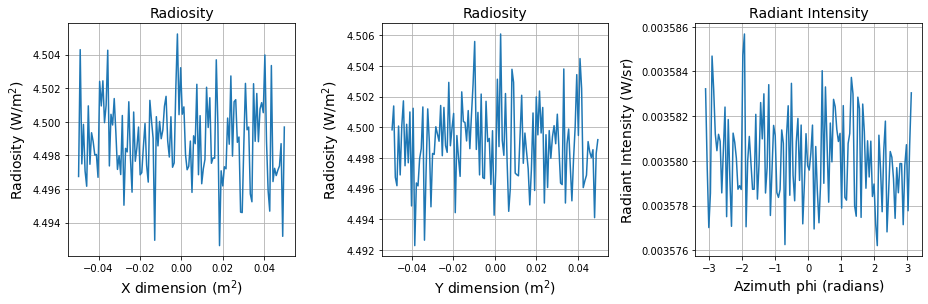

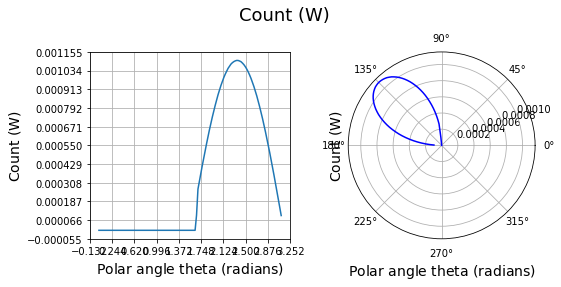

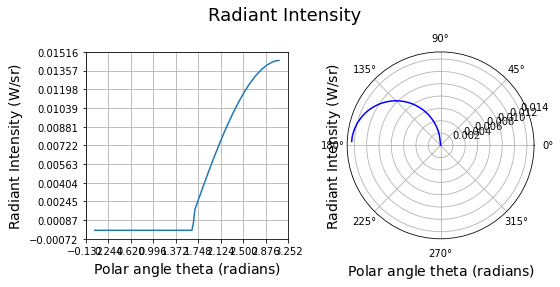

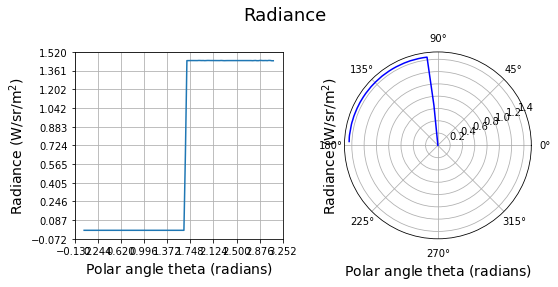

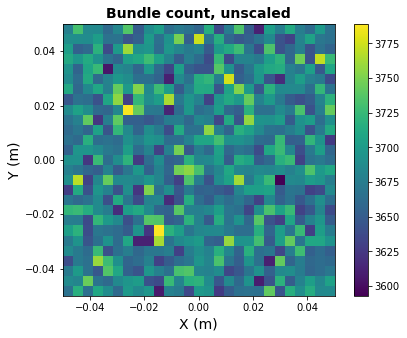

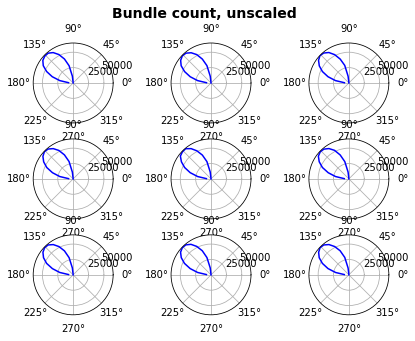

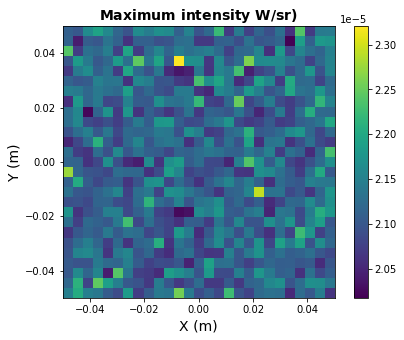

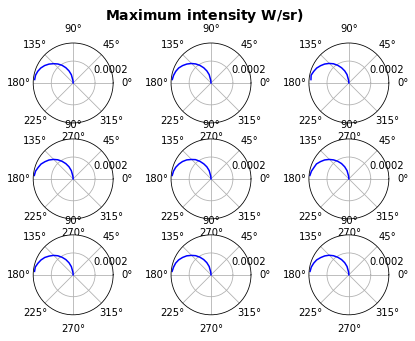

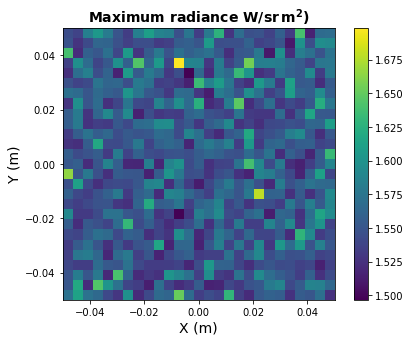

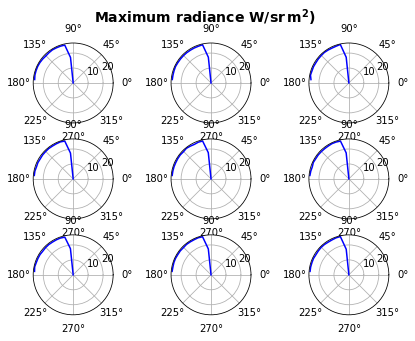

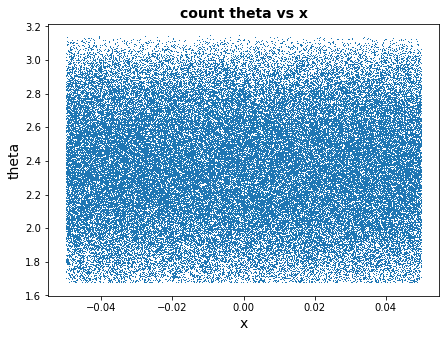

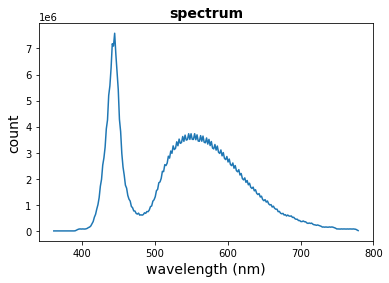

Output()

In [4]:
viz_cuda.summary(results._source_stage)
viz_cuda.plot_all_histograms(results._source_stage)
viz_cuda.plot_stages_3d([results._source_stage])

# <center> Camera Plane

total photons: 1.56e+10
photon bundle count: 5.20e+04
photon total energy (J): 5.85e-09
photon total power (W): 5.85e-06


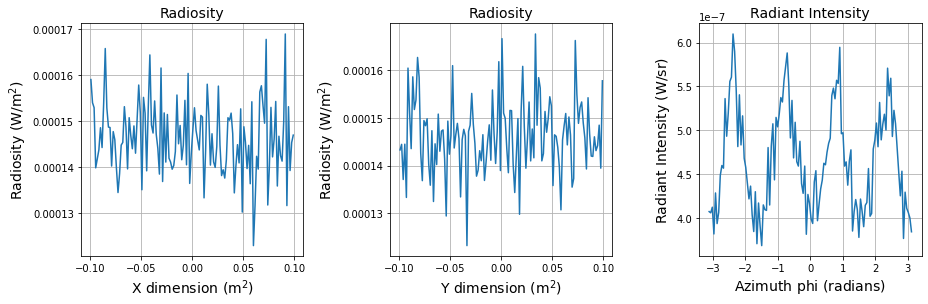

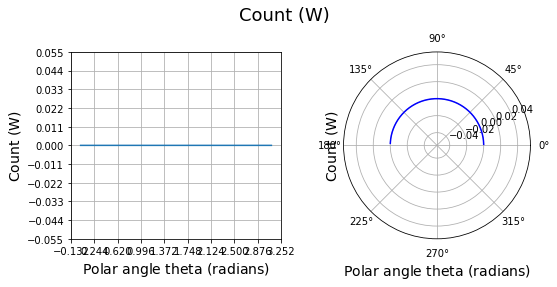

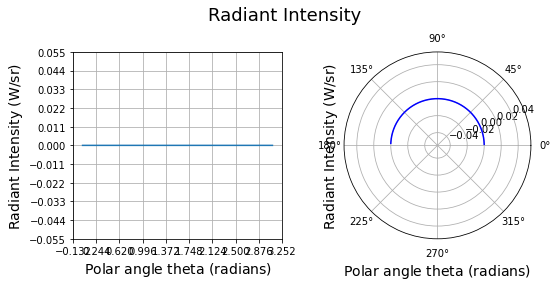

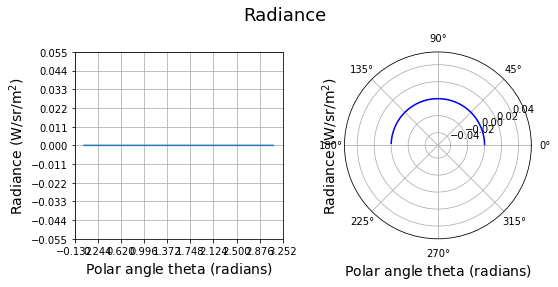

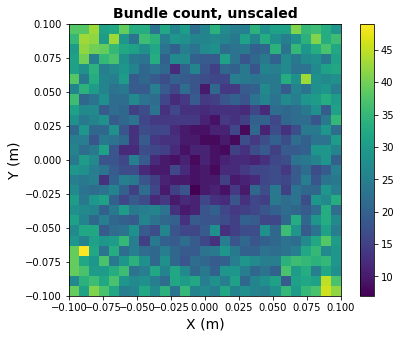

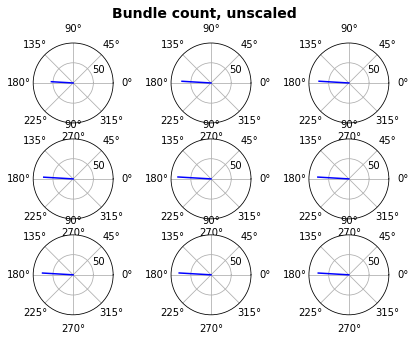

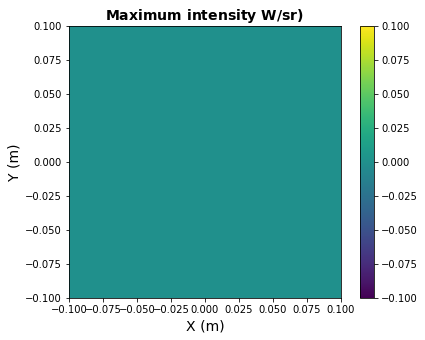

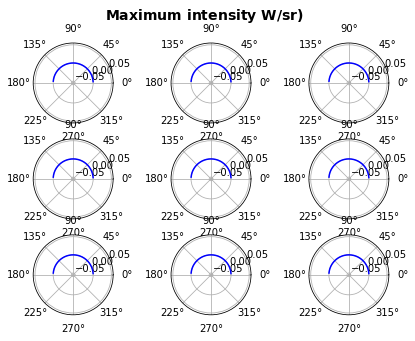

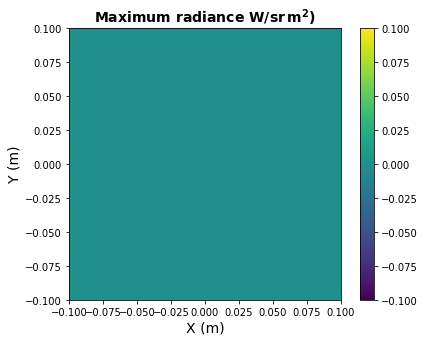

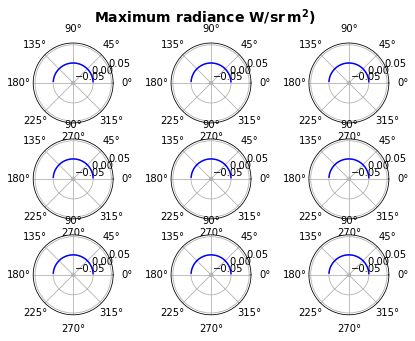

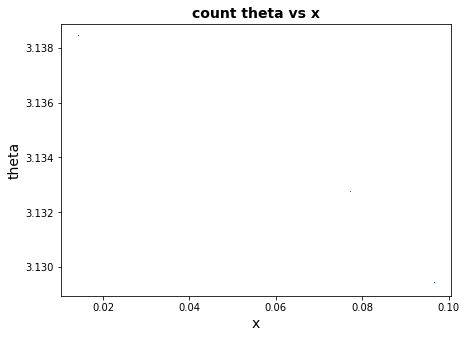

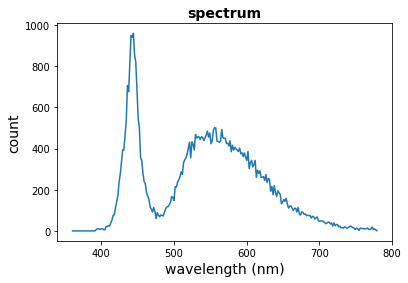

Output()

In [5]:
viz_cuda.summary(results._camera_plane_stage)
viz_cuda.plot_all_histograms(results._camera_plane_stage)
viz_cuda.plot_stages_3d([results._camera_plane_stage])

total photons: 1.20e+09
photon bundle count: 4.00e+03
photon total energy (J): 3.56e-10
photon total power (W): 3.56e-07


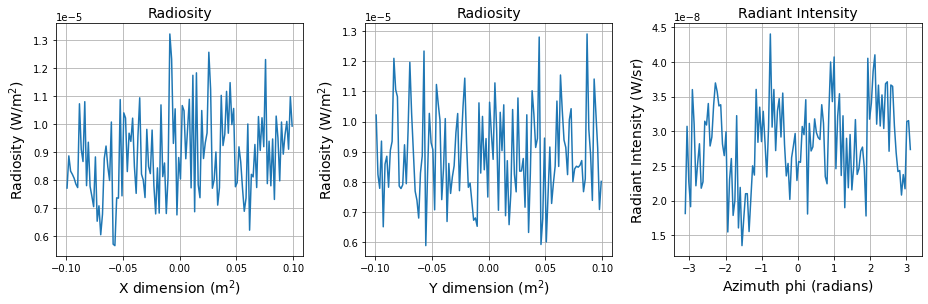

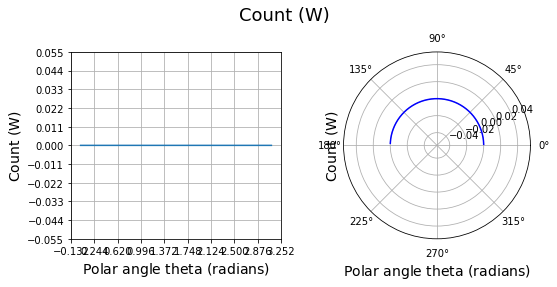

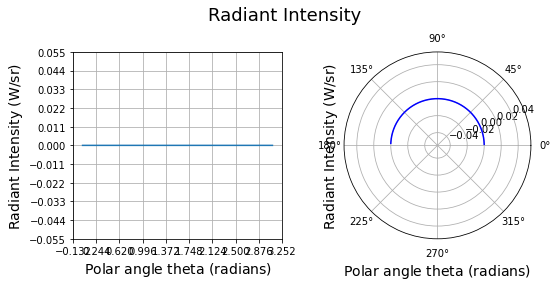

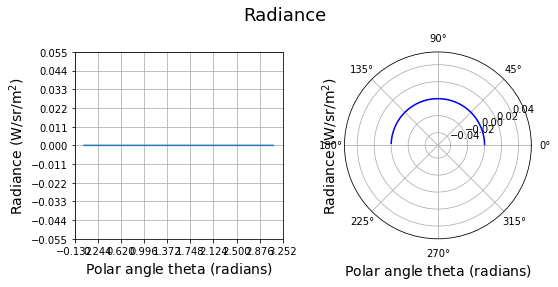

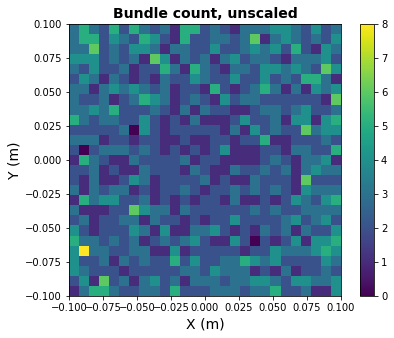

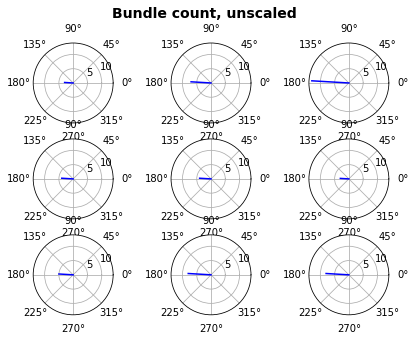

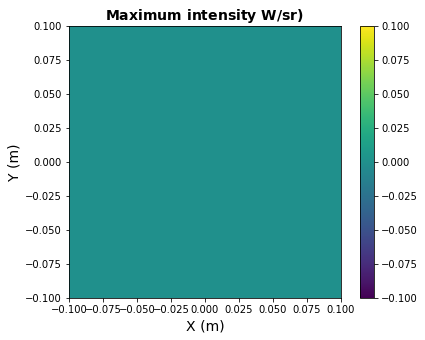

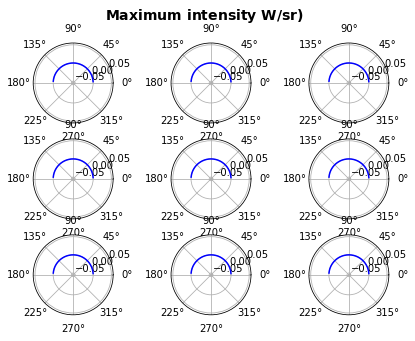

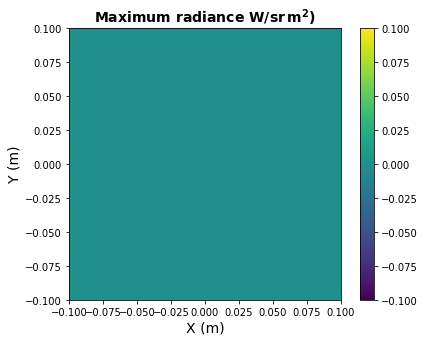

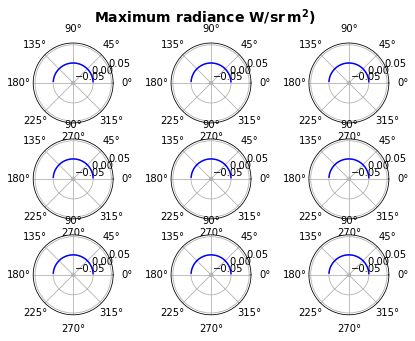

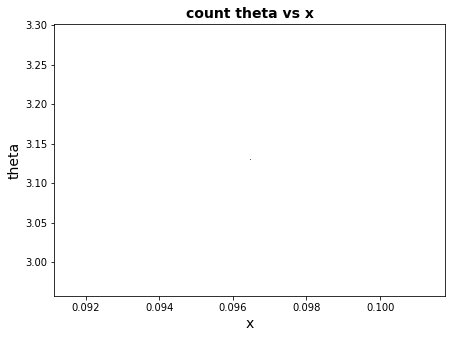

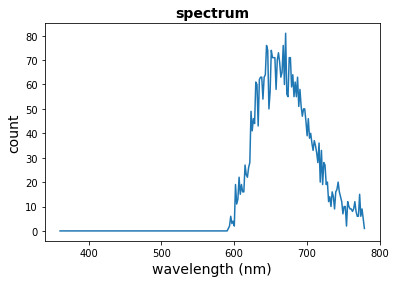

Output()

In [6]:
# after the filter
viz_cuda.summary(results._filter_stage)
viz_cuda.plot_all_histograms(results._filter_stage)
viz_cuda.plot_stages_3d([results._filter_stage])

total photons: 1.80e+06
photon bundle count: 6.00e+00
photon total energy (J): 5.48e-13
photon total power (W): 5.48e-10


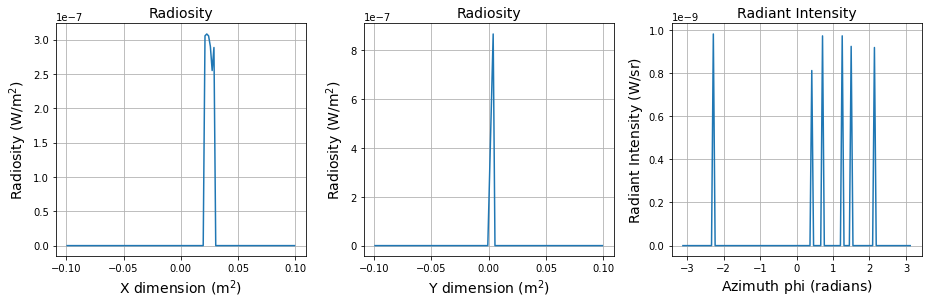

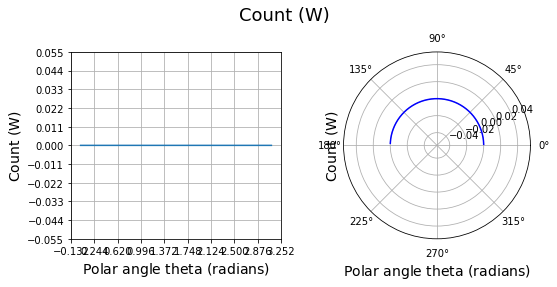

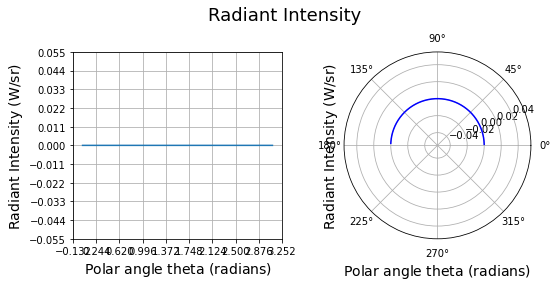

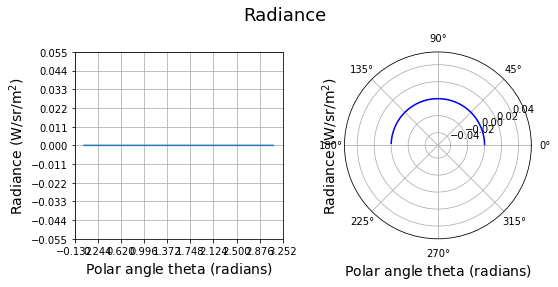

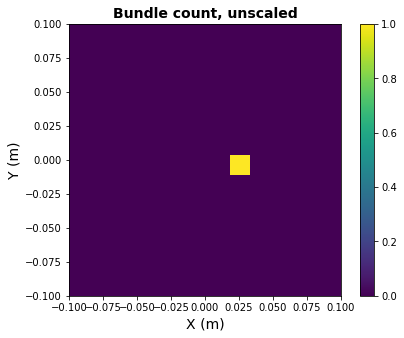

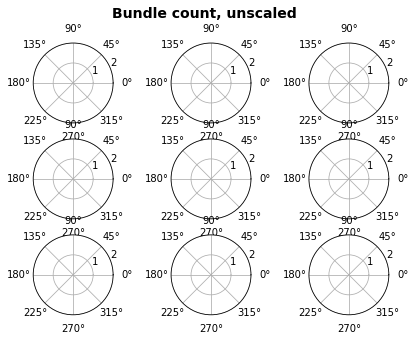

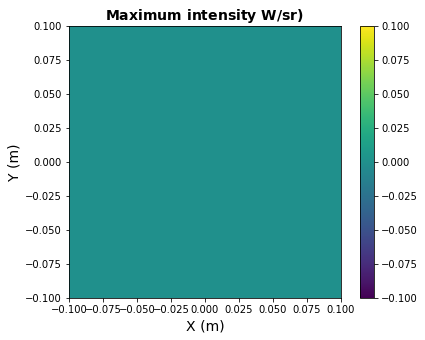

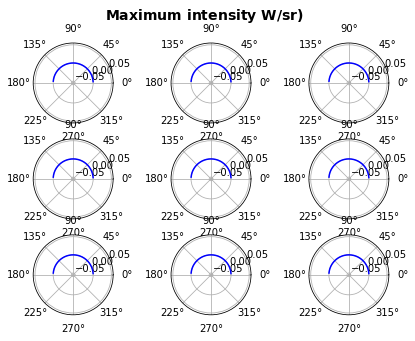

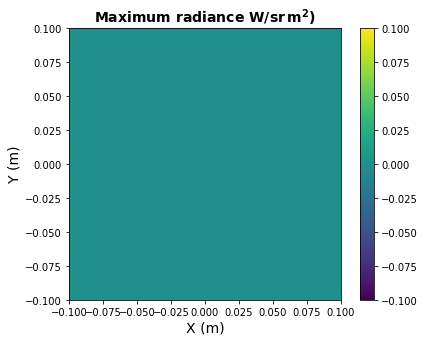

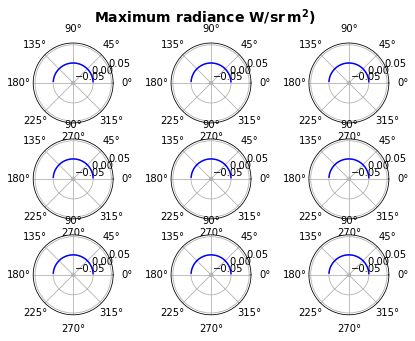

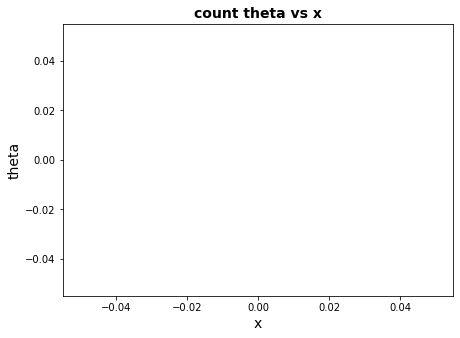

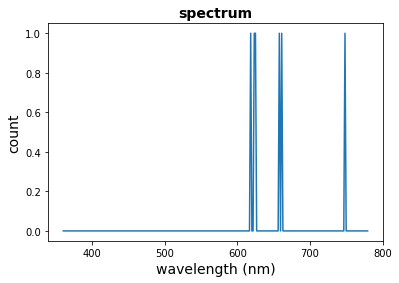

Output()

In [7]:
# same as the camera dimensions
viz_cuda.summary(results._camera_lens_stage)
viz_cuda.plot_all_histograms(results._camera_lens_stage)
viz_cuda.plot_stages_3d([results._camera_lens_stage])

In [8]:
viz_cuda.plot_stages_3d([results._source_stage, results._camera_plane_stage])

Output()

In [9]:
print(f"camera total {simulator._camera._total_photons}")

camera total 1800000.0
